<a href="https://colab.research.google.com/github/saraishikawa/qmacrofinalproblem/blob/main/rennsyuu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701cd85dcd7>:48: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
<ipython-input-1-c701

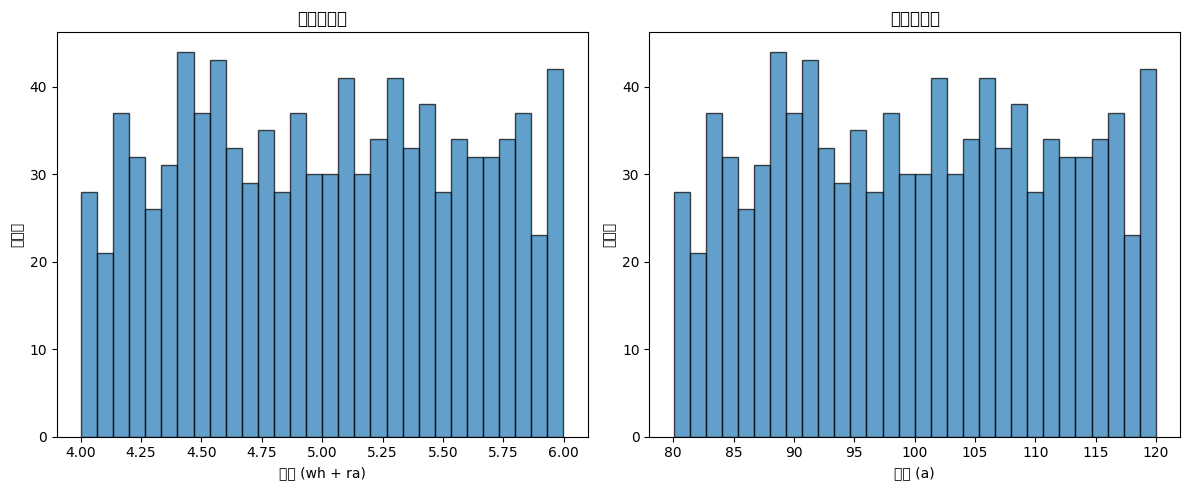

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# モデルのパラメータ
num_individuals = 1000  # 個人の数
initial_capital = 100   # 初期の資本量
r_a = 0.05              # 資本の利子率
tau_k = 0.0             # 資本所得税率 (初期値は0%)

# 各個人の資本と所得をランダムに初期化
capital = np.random.uniform(80, 120, num_individuals)
income = r_a * capital

# 資本所得税を課税し、再分配する関数
def tax_and_redistribute(capital, income, tax_rate):
    tax_amount = income * tax_rate
    income_after_tax = income - tax_amount
    total_tax_collected = np.sum(tax_amount)
    redistribution_per_person = total_tax_collected / len(capital)
    capital += redistribution_per_person
    return capital

# モデルのシミュレーション
num_iterations = 100  # シミュレーションのイテレーション回数

# 1. τk = 0の場合の均衡を計算
for i in range(num_iterations):
    capital = tax_and_redistribute(capital, income, tau_k)

# 2. 所得と資産の分布の図を描く
plt.figure(figsize=(12, 5))

# 所得の分布
plt.subplot(1, 2, 1)
income_distribution = r_a * capital
plt.hist(income_distribution, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('所得 (wh + ra)')
plt.ylabel('個人数')
plt.title('所得の分布')

# 資産の分布
plt.subplot(1, 2, 2)
plt.hist(capital, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('資産 (a)')
plt.ylabel('個人数')
plt.title('資産の分布')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12377 (\N{HIRAGANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

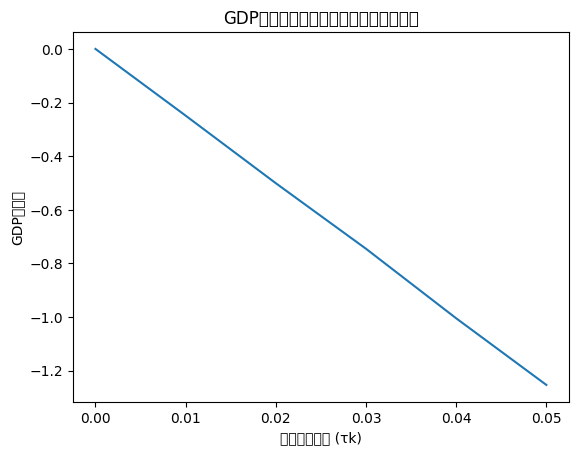

In [2]:
# 3. 資本所得税率の増加による実験
tax_rates = np.arange(0, 0.06, 0.01)
gdp_changes = []

for tax_rate in tax_rates:
    capital = np.random.uniform(80, 120, num_individuals)
    income = r_a * capital

    # 均衡を計算
    for i in range(num_iterations):
        capital = tax_and_redistribute(capital, income, tax_rate)

    # GDP変化の計算
    gdp_changes.append(np.mean(income) - r_a * np.mean(capital))

# 結果のプロット
plt.plot(tax_rates, gdp_changes)
plt.xlabel('資本所得税率 (τk)')
plt.ylabel('GDPの変化')
plt.title('GDPの変化に対する資本所得税率の影響')
plt.show()